In [2]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [22]:
class AgentState(TypedDict):
    number1: int
    number2: int
    number3: int
    number4: int
    operation1: str
    operation2: str
    final_answer1: int
    final_answer2: int

In [23]:
def first_addition_node(state:AgentState) -> AgentState:
    """ Adding number1 and number2 """
    state["final_answer1"] = state["number1"] + state["number2"]
    return state

In [24]:
def first_subtract_node(state:AgentState) -> AgentState:
    """ Subtracting number1 and number2"""
    state["final_answer1"] = state["number1"] - state["number2"]
    return state

In [25]:
def second_addition_node(state:AgentState) -> AgentState:
    """ Adding number3 and number4 """
    state["final_answer2"] = state["number3"] + state["number4"]
    return state

In [26]:
def second_subtract_node(state:AgentState) -> AgentState:
    """ Subtracting number3 and number4 """
    state["final_answer2"] = state["number3"] - state["number4"]
    return state

In [27]:
def first_router(state:AgentState)->AgentState:
    if state["operation1"] == "+":
        return "first_addition_node"
    elif state["operation1"] == "-":
        return "first_subtract_node"

In [28]:
def second_router(state:AgentState)->AgentState:
    if state["operation2"] == "+":
        return "second_addition_node"
    elif state["operation2"] == "-":
        return "second_subtract_node"

In [29]:
graph = StateGraph(AgentState)
graph.add_node("first_addition_node", first_addition_node)
graph.add_node("first_subtract_node", first_subtract_node)
graph.add_node("second_addition_node", second_addition_node)
graph.add_node("second_subtract_node", second_subtract_node)
graph.add_node("first_router", lambda state:state)
graph.add_node("second_router", lambda state:state)

graph.add_edge(START, "first_router")
graph.add_conditional_edges("first_router", first_router, {"first_addition_node": "first_addition_node", "first_subtract_node": "first_subtract_node"} )
graph.add_edge("first_addition_node", "second_router")
graph.add_edge("first_subtract_node", "second_router")

graph.add_conditional_edges("second_router", second_router, {"second_addition_node": "second_addition_node", "second_subtract_node": "second_subtract_node"})
graph.add_edge("second_addition_node", END)
graph.add_edge("second_subtract_node", END)

app = graph.compile()

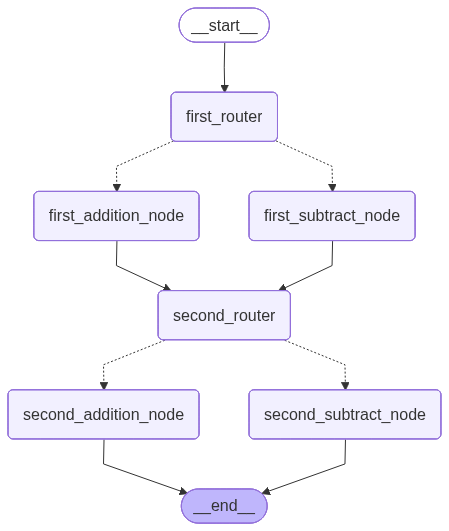

In [20]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [33]:
initial_state = AgentState(number1=10, number2=25, number3=15, number4=10, operation1="+", operation2="-")
app.invoke(initial_state)

{'number1': 10,
 'number2': 25,
 'number3': 15,
 'number4': 10,
 'operation1': '+',
 'operation2': '-',
 'final_answer1': 35,
 'final_answer2': 5}